Import Libraries, Load Training File, and Perform Exploratory Analysis

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline

# Load and preprocess dataset
df = pd.read_csv('train.csv')

print(df.shape)
print(df.columns)
print(df.head)
print(df.info)
print(df.describe)
print(df.isnull().sum)

df['Credit_Score'].value_counts(normalize=True, ascending=True)

C:\Users\gudev\AppData\Local\Temp\ipykernel_28620\3439931195.py:16: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


(100000, 28)
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
<bound method NDFrame.head of             ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0

<bound method NDFrame._add_numeric_operations.<locals>.sum of           ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
99995  False        False  False  False  False  False       False   
99996  False        False  False  False  False  False       False   
99997  False        False  False  False  False  False       False   
99998  False        False  False  False  False  False       False   
99999  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  

Good        0.17828
Poor        0.28998
Standard    0.53174
Name: Credit_Score, dtype: float64

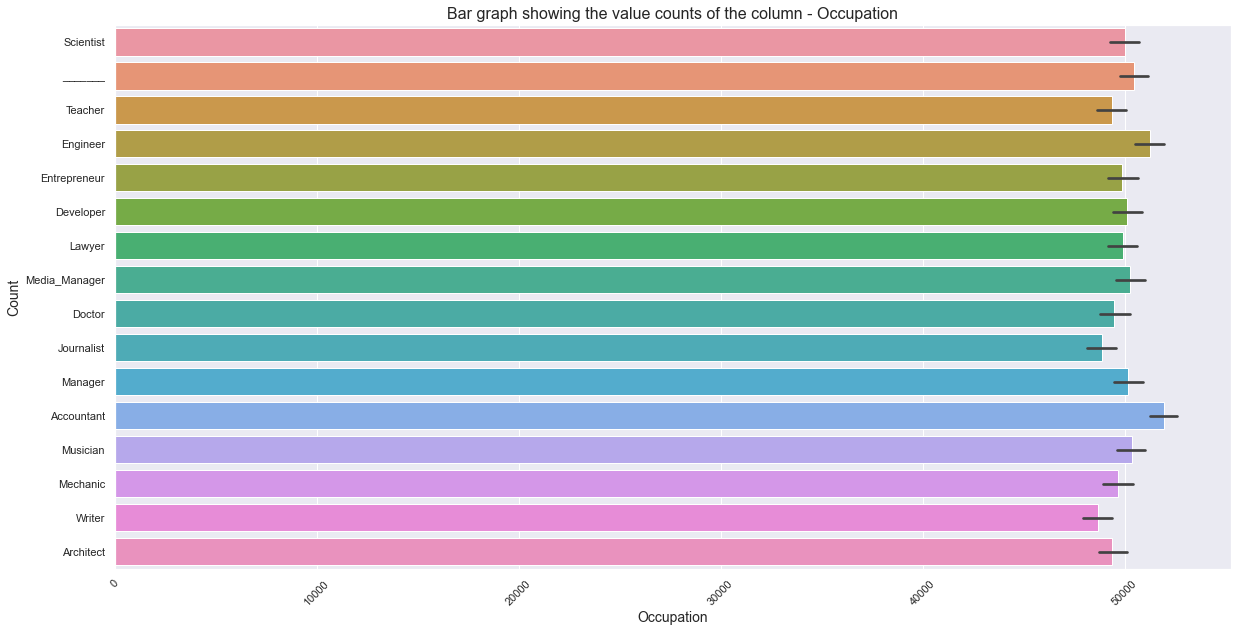

In [6]:


sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=df.Occupation.index, y=df.Occupation.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()



Encoding

In [2]:
cat_features = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))

y = df['Credit_Score']
X = df.drop('Credit_Score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#X_train.to_csv('train_data.csv', index=False)

from sklearn.impute import SimpleImputer

# Define a SimpleImputer to impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data
imputer.fit(X_train)

# Impute missing values in both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

Logistic Regression

In [3]:
# Define logistic regression model
logreg = LogisticRegression(multi_class='ovr')

# Train the model
logreg.fit(X_train, y_train)

# Predict the probabilities of each class for test data
y_pred_prob_logreg = logreg.predict_proba(X_test)

# Predict the labels for test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Precision:', precision_score(y_test, y_pred_logreg, average='macro'))
print('Recall:', recall_score(y_test, y_pred_logreg, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_logreg, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, y_pred_prob_logreg, multi_class='ovr'))

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg, multi_class='ovr')

C:\Users\gudev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gudev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.5380333333333334
Precision: 0.49313494292111465
Recall: 0.3677221722947797
F1-score: 0.32397468415980274
ROC AUC: 0.6449931945293649


K-Nearest Neighbors (KNN)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels for test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn, average='macro'))
print('Recall:', recall_score(y_test, y_pred_knn, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_knn, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr'))

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.4999
Precision: 0.44811048581220375
Recall: 0.44547892880154416
F1-score: 0.44653008917749054
ROC AUC: 0.6374501940940801


Decision Trees

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Define decision tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict the labels for test data
y_pred_dt = dt.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt, average='macro'))
print('Recall:', recall_score(y_test, y_pred_dt, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_dt, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr'))

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.673
Precision: 0.6518756080809447
Recall: 0.6554257604466999
F1-score: 0.6535779119848991
ROC AUC: 0.7352663818950843


Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define random forest model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predict the labels for test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, average='macro'))
print('Recall:', recall_score(y_test, y_pred_rf, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_rf, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.7830666666666667
Precision: 0.7732398676566068
Recall: 0.7674382403722021
F1-score: 0.7702096028048516
ROC AUC: 0.9072579182191299


Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

# Define naive bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict the labels for test data
y_pred_nb = nb.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Precision:', precision_score(y_test, y_pred_nb, average='macro'))
print('Recall:', recall_score(y_test, y_pred_nb, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_nb, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, nb.predict_proba(X_test), multi_class='ovr'))

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
roc_auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.5732333333333334
Precision: 0.5439473570633636
Recall: 0.552305849898064
F1-score: 0.5466315150932565
ROC AUC: 0.7322785180726786


Linear Discriminant Analysis (LDA)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Predict the labels for test data
y_pred_lda = lda.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_lda))
print('Precision:', precision_score(y_test, y_pred_lda, average='macro'))
print('Recall:', recall_score(y_test, y_pred_lda, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_lda, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, lda.predict_proba(X_test), multi_class='ovr'))

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='macro')
recall_lda = recall_score(y_test, y_pred_lda, average='macro')
f1_lda = f1_score(y_test, y_pred_lda, average='macro')
roc_auc_lda = roc_auc_score(y_test, lda.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.5926666666666667
Precision: 0.56792534777152
Recall: 0.49206245592324865
F1-score: 0.5069090075882751
ROC AUC: 0.7468965173257867


Quadratic Discriminant Analysis (QDA)

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define QDA model
qda = QuadraticDiscriminantAnalysis()

# Train the model
qda.fit(X_train, y_train)

# Predict the labels for test data
y_pred_qda = qda.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_qda))
print('Precision:', precision_score(y_test, y_pred_qda, average='macro'))
print('Recall:', recall_score(y_test, y_pred_qda, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_qda, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, qda.predict_proba(X_test), multi_class='ovr'))

accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda, average='macro')
recall_qda = recall_score(y_test, y_pred_qda, average='macro')
f1_qda = f1_score(y_test, y_pred_qda, average='macro')
roc_auc_qda = roc_auc_score(y_test, qda.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.5943
Precision: 0.5671039709173028
Recall: 0.5727938198127448
F1-score: 0.5682512766370975
ROC AUC: 0.7516289700115206


Gradient Boosting Machines (GBM)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Define GBM model
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, y_train)

# Predict the labels for test data
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_gbm))
print('Precision:', precision_score(y_test, y_pred_gbm, average='macro'))
print('Recall:', recall_score(y_test, y_pred_gbm, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_gbm, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, gbm.predict_proba(X_test), multi_class='ovr'))

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='macro')
recall_gbm = recall_score(y_test, y_pred_gbm, average='macro')
f1_gbm = f1_score(y_test, y_pred_gbm, average='macro')
roc_auc_gbm = roc_auc_score(y_test, gbm.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.6917333333333333
Precision: 0.676077383429976
Recall: 0.6606713148750232
F1-score: 0.6650320610217203
ROC AUC: 0.8471769071295115


AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier

# Define AdaBoost model
adaboost = AdaBoostClassifier()

# Train the model
adaboost.fit(X_train, y_train)

# Predict the labels for test data
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_adaboost))
print('Precision:', precision_score(y_test, y_pred_adaboost, average='macro'))
print('Recall:', recall_score(y_test, y_pred_adaboost, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_adaboost, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, adaboost.predict_proba(X_test), multi_class='ovr'))

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='macro')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='macro')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='macro')
roc_auc_adaboost = roc_auc_score(y_test, adaboost.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.6353333333333333
Precision: 0.6138163585568902
Recall: 0.5856849595256521
F1-score: 0.5964588189928931
ROC AUC: 0.7852947036410608


Stochastic Gradient Descent (SGD)

In [7]:
from sklearn.linear_model import SGDClassifier

# Define SGD model
sgd = SGDClassifier(loss='log_loss', learning_rate='adaptive', eta0=0.1, max_iter=1000)

# Train the model
sgd.fit(X_train, y_train)

# Predict the labels for test data
y_pred_sgd = sgd.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_sgd))
print('Precision:', precision_score(y_test, y_pred_sgd, average='macro'))
print('Recall:', recall_score(y_test, y_pred_sgd, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_sgd, average='macro'))

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test, y_pred_sgd, average='macro')
f1_sgd = f1_score(y_test, y_pred_sgd, average='macro')

NameError: name 'X_train' is not defined

Ridge Classifer

In [13]:
from sklearn.linear_model import RidgeClassifier

# Define Ridge Classifier model
ridge = RidgeClassifier()

# Train the model
ridge.fit(X_train, y_train)

# Predict the labels for test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_ridge))
print('Precision:', precision_score(y_test, y_pred_ridge, average='macro'))
print('Recall:', recall_score(y_test, y_pred_ridge, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_ridge, average='macro'))

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
precision_ridge = precision_score(y_test, y_pred_ridge, average='macro')
recall_ridge = recall_score(y_test, y_pred_ridge, average='macro')
f1_ridge = f1_score(y_test, y_pred_ridge, average='macro')

Accuracy: 0.5847
Precision: 0.556650444419128
Recall: 0.4451180113812949
F1-score: 0.43699069137738683


Lasso Classifier

In [14]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model with L1 penalty
lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model
lasso.fit(X_train, y_train)

# Predict the labels for test data
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_lasso))
print('Precision:', precision_score(y_test, y_pred_lasso, average='macro'))
print('Recall:', recall_score(y_test, y_pred_lasso, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_lasso, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, lasso.predict_proba(X_test), multi_class='ovr'))

accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
precision_lasso = precision_score(y_test, y_pred_lasso, average='macro')
recall_lasso = recall_score(y_test, y_pred_lasso, average='macro')
f1_lasso = f1_score(y_test, y_pred_lasso, average='macro')
roc_auc_lasso = roc_auc_score(y_test, lasso.predict_proba(X_test), multi_class='ovr')

Accuracy: 0.5895
Precision: 0.5689543895771126
Recall: 0.4792362393612528
F1-score: 0.4923037059619116
ROC AUC: 0.7483812603707433


Elastic Net Classifier

In [15]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model with Elastic Net regularization
elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

# Train the model
elastic.fit(X_train, y_train)

# Predict the labels for test data
y_pred_elastic = elastic.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_elastic))
print('Precision:', precision_score(y_test, y_pred_elastic, average='macro'))
print('Recall:', recall_score(y_test, y_pred_elastic, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_elastic, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, elastic.predict_proba(X_test), multi_class='ovr'))

accuracy_elastic = accuracy_score(y_test, y_pred_elastic)
precision_elastic = precision_score(y_test, y_pred_elastic, average='macro')
recall_elastic = recall_score(y_test, y_pred_elastic, average='macro')
f1_elastic = f1_score(y_test, y_pred_elastic, average='macro')
roc_auc_elastic = roc_auc_score(y_test, elastic.predict_proba(X_test), multi_class='ovr')

C:\Users\gudev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5486333333333333
Precision: 0.5091275305785627
Recall: 0.39036423351329236
F1-score: 0.3629558750518141
ROC AUC: 0.6654497916862989


Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define SVM model
svm = SVC(kernel='rbf', probability=True)

# Train the model
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model performance
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm, average='macro'))
print('Recall:', recall_score(y_test, y_pred_svm, average='macro'))
print('F1-score:', f1_score(y_test, y_pred_svm, average='macro'))
print('ROC AUC:', roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovr'))

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
roc_auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovr')

Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

# Load and preprocess dataset
df = pd.read_csv('train.csv')
y = df['Credit_Score'].values
X = df.drop('Credit_Score', axis=1).values

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with loss function, optimizer, and evaluation metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict the labels for test data
y_pred_nn = model.predict(X_test)
y_pred_nn = [1 if y >= 0.5 else 0 for y in y_pred_nn]

# Evaluate the model performance on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Calculate metrics
average_method = 'macro'
print('Precision:', precision_score(y_test, y_pred_nn, average=average_method))
print('Recall:', recall_score(y_test, y_pred_nn, average=average_method))
print('F1-score:', f1_score(y_test, y_pred_nn, average=average_method))

# Compute ROC AUC score for multiclass
lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_pred_nn)
print('ROC AUC:', roc_auc_score(y_test_binarized, y_pred_binarized, average=average_method))

accuracy_nn = test_acc
precision_nn = precision_score(y_test, y_pred_nn, average=average_method)
recall_nn = recall_score(y_test, y_pred_nn, average=average_method)
f1_nn = f1_score(y_test, y_pred_nn, average=average_method)
roc_auc_nn = roc_auc_score(y_test_binarized, y_pred_binarized, average=average_method)

<ipython-input-16-128d731eff47>:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


Epoch 1/50
1750/1750 [==============================] - 4s 2ms/step - loss: -380792000.0000 - accuracy: 0.2882 - val_loss: -1453415040.0000 - val_accuracy: 0.2874
Epoch 2/50
1750/1750 [==============================] - 5s 3ms/step - loss: -4561262080.0000 - accuracy: 0.2888 - val_loss: -8824376320.0000 - val_accuracy: 0.2874
Epoch 3/50
1750/1750 [==============================] - 3s 2ms/step - loss: -15829260288.0000 - accuracy: 0.2888 - val_loss: -24066897920.0000 - val_accuracy: 0.2874
Epoch 4/50
1750/1750 [==============================] - 3s 2ms/step - loss: -35695099904.0000 - accuracy: 0.2888 - val_loss: -48664195072.0000 - val_accuracy: 0.2874
Epoch 5/50
1750/1750 [==============================] - 4s 2ms/step - loss: -65736232960.0000 - accuracy: 0.2888 - val_loss: -84154646528.0000 - val_accuracy: 0.2874
Epoch 6/50
1750/1750 [==============================] - 4s 2ms/step - loss: -107322449920.0000 - accuracy: 0.2888 - val_loss: -131600752640.0000 - val_accuracy: 0.2874
Epoch 7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Data Visualization

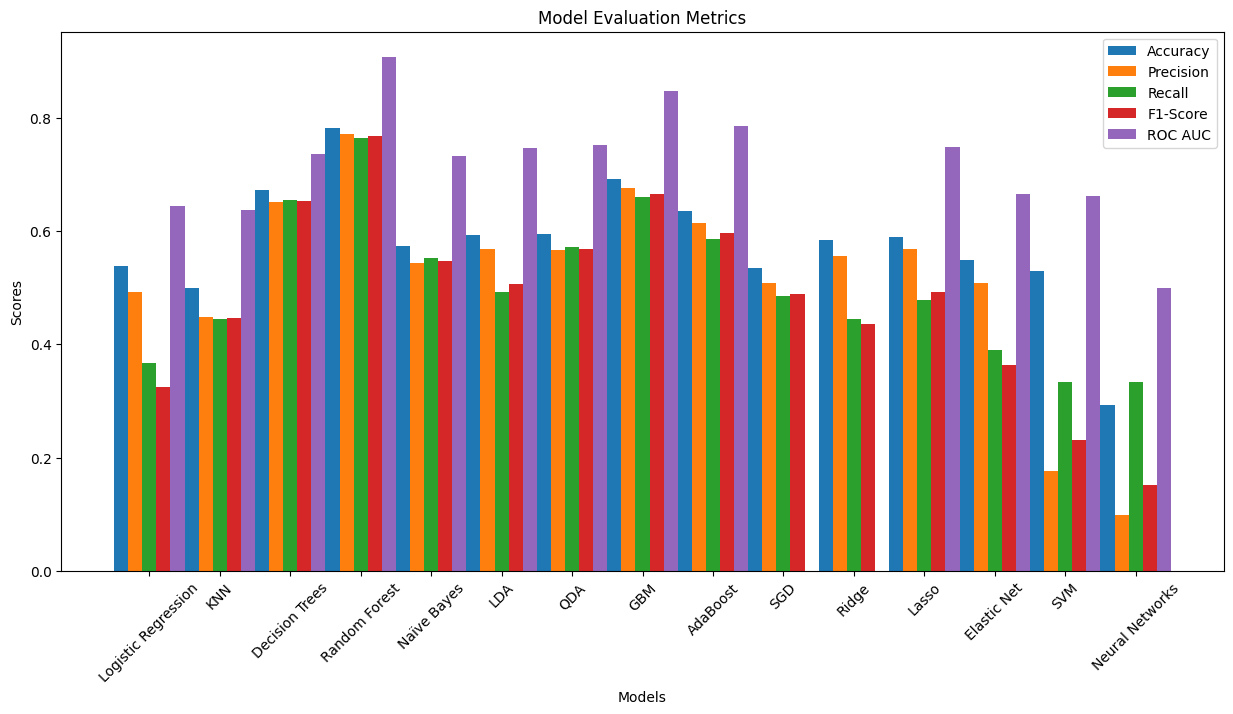

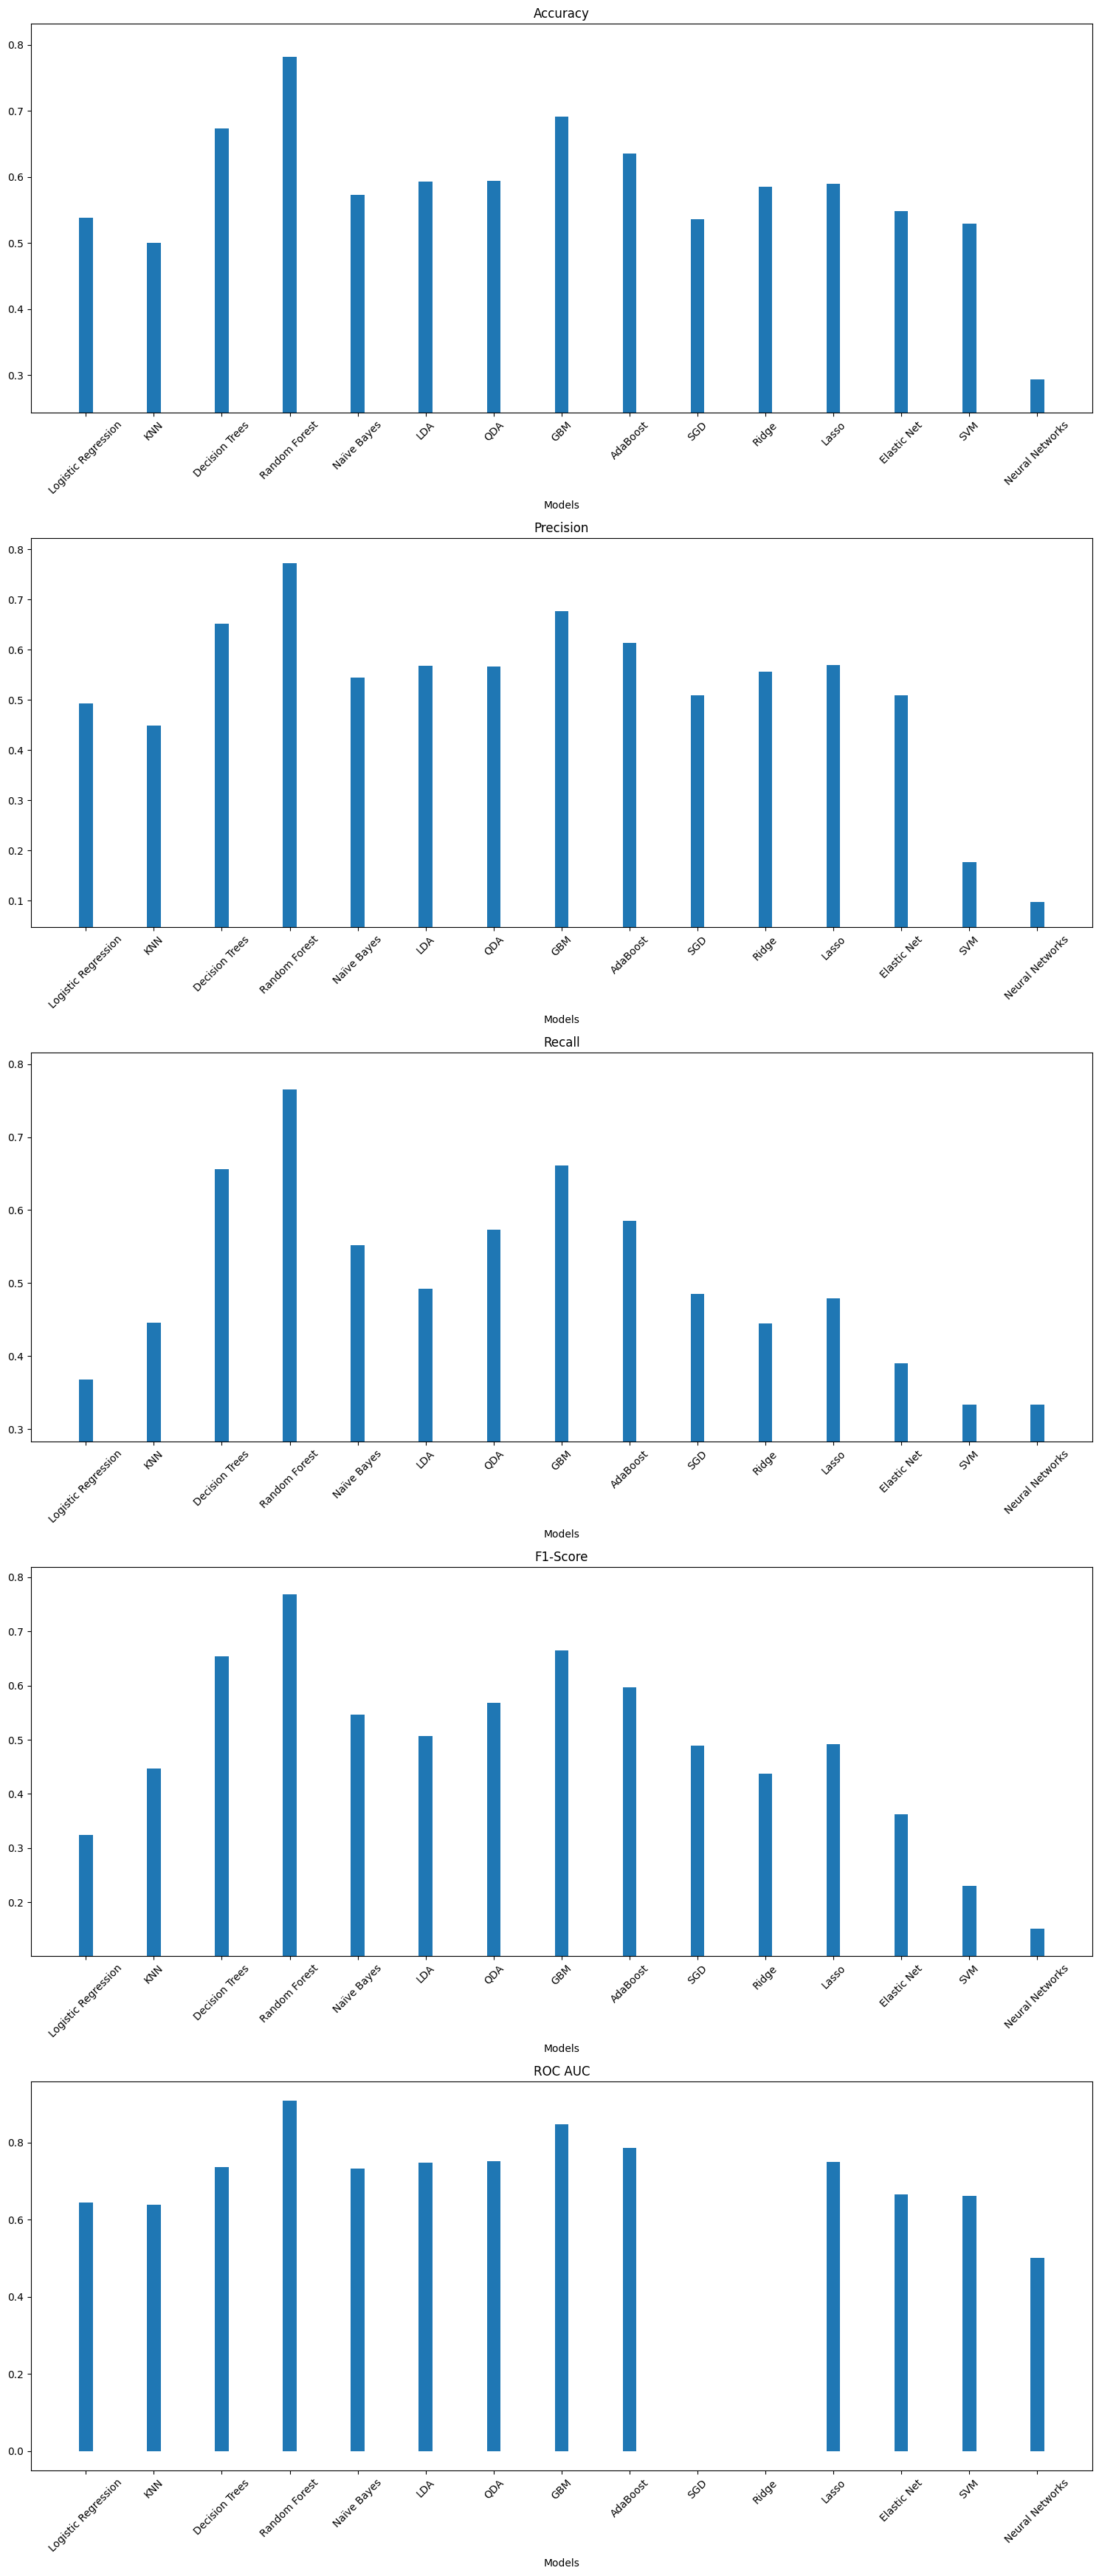

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'Naïve Bayes',
          'LDA', 'QDA', 'GBM', 'AdaBoost', 'SGD', 'Ridge', 'Lasso', 'Elastic Net',
          'SVM', 'Neural Networks']

accuracy = [accuracy_logreg, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_nb,
            accuracy_lda, accuracy_qda, accuracy_gbm, accuracy_adaboost, accuracy_sgd,
            accuracy_ridge, accuracy_lasso, accuracy_elastic, accuracy_svm, accuracy_nn]

precision = [precision_logreg, precision_knn, precision_dt, precision_rf, precision_nb,
             precision_lda, precision_qda, precision_gbm, precision_adaboost, precision_sgd,
             precision_ridge, precision_lasso, precision_elastic, precision_svm, precision_nn]

recall = [recall_logreg, recall_knn, recall_dt, recall_rf, recall_nb,
          recall_lda, recall_qda, recall_gbm, recall_adaboost, recall_sgd,
          recall_ridge, recall_lasso, recall_elastic, recall_svm, recall_nn]

f1_score = [f1_logreg, f1_knn, f1_dt, f1_rf, f1_nb,
            f1_lda, f1_qda, f1_gbm, f1_adaboost, f1_sgd,
            f1_ridge, f1_lasso, f1_elastic, f1_svm, f1_nn]

roc_auc = [roc_auc_logreg, roc_auc_knn, roc_auc_dt, roc_auc_rf, roc_auc_nb,
           roc_auc_lda, roc_auc_qda, roc_auc_gbm, roc_auc_adaboost, 0,  # SGD doesn't have ROC AUC
           0,  # Ridge doesn't have ROC AUC
           roc_auc_lasso, roc_auc_elastic, roc_auc_svm, roc_auc_nn]

n_models = len(models)
index = np.arange(n_models)
bar_width = 0.2

fig, ax = plt.subplots(figsize=(15, 7))

bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score')
bar5 = ax.bar(index + 4 * bar_width, roc_auc, bar_width, label='ROC AUC')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.show()

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 35))

# Plot Accuracy
axs[0].bar(index, accuracy, bar_width)
axs[0].set_title('Accuracy')
axs[0].set_xticks(index)
axs[0].set_xticklabels(models)
axs[0].set_ylim([min(accuracy) - 0.05, max(accuracy) + 0.05])

# Plot Precision
axs[1].bar(index, precision, bar_width)
axs[1].set_title('Precision')
axs[1].set_xticks(index)
axs[1].set_xticklabels(models)
axs[1].set_ylim([min(precision) - 0.05, max(precision) + 0.05])

# Plot Recall
axs[2].bar(index, recall, bar_width)
axs[2].set_title('Recall')
axs[2].set_xticks(index)
axs[2].set_xticklabels(models)
axs[2].set_ylim([min(recall) - 0.05, max(recall) + 0.05])

# Plot F1-Score
axs[3].bar(index, f1_score, bar_width)
axs[3].set_title('F1-Score')
axs[3].set_xticks(index)
axs[3].set_xticklabels(models)
axs[3].set_ylim([min(f1_score) - 0.05, max(f1_score) + 0.05])

# Plot ROC AUC
axs[4].bar(index, roc_auc, bar_width)
axs[4].set_title('ROC AUC')
axs[4].set_xticks(index)
axs[4].set_xticklabels(models)
axs[4].set_ylim([min(roc_auc) - 0.05, max(roc_auc) + 0.05])

for ax in axs:
    ax.set_xlabel('Models')
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


We've selected Random Forest to be the optimal model for our dataset, based on our 5 performance metrics.